# Importando bibliotecas necessárias

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. Criando um conjunto de dados sintético


In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)


 Aqui, estamos simulando um conjunto de dados para prever falhas em um equipamento.
O `make_classification` gera um dataset com 1000 amostras e 2 características (features).
 As duas características são informativas, o que significa que elas têm um impacto direto na previsão de falhas.

# 2. Dividindo o conjunto de dados em treino e teste



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Dividimos o conjunto de dados em 70% para treinamento e 30% para teste.

# Padronizando os dados


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

A normalização padroniza as características para que todas tenham média 0 e desvio padrão 1.
Isso é importante para algoritmos de machine learning que são sensíveis à escala das características.

# 3. Treinando o algoritmo no conjunto de treino

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

KNN é um algoritmo de classificação que usa a proximidade dos pontos para prever a classe de uma nova amostra.
 Definimos k = 5, o que significa que o algoritmo considerará os 5 vizinhos mais próximos para a previsão.

# 4. Testando o algoritmo no conjunto de teste



In [ ]:
y_pred = knn.predict(X_test)

Usamos o modelo treinado para prever se o equipamento falhará ou não nas amostras de teste.

# 5. Aplicando métricas de avaliação


In [ ]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Curva ROC e AUC
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Erro em função do k
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Fronteira de decisão entre variáveis
def plot_decision_boundary(X, y, model, ax, h=0.02, cmap='coolwarm'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')


Matriz de Confusão: mostra a contagem das previsões corretas e incorretas.


A curva ROC mostra a sensibilidade vs. 1-especificidade do modelo.


AUC (Área sob a curva ROC) é uma medida agregada da performance do modelo em todas as classificações possíveis.

Para encontrar o melhor valor de k, analisamos a taxa de erro para diferentes valores de k.

A  fronteira de decisão é uma visualização que mostra como o modelo divide as diferentes classes no espaço das características.

# 6. Comentando os resultados



In [ ]:
print(f'Matriz de Confusão:\n{conf_matrix}')
print(f'ROC AUC: {roc_auc:.2f}')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Matriz de Confusão:
[[142   6]
 [ 16 136]]
ROC AUC: 0.95
Accuracy: 0.93


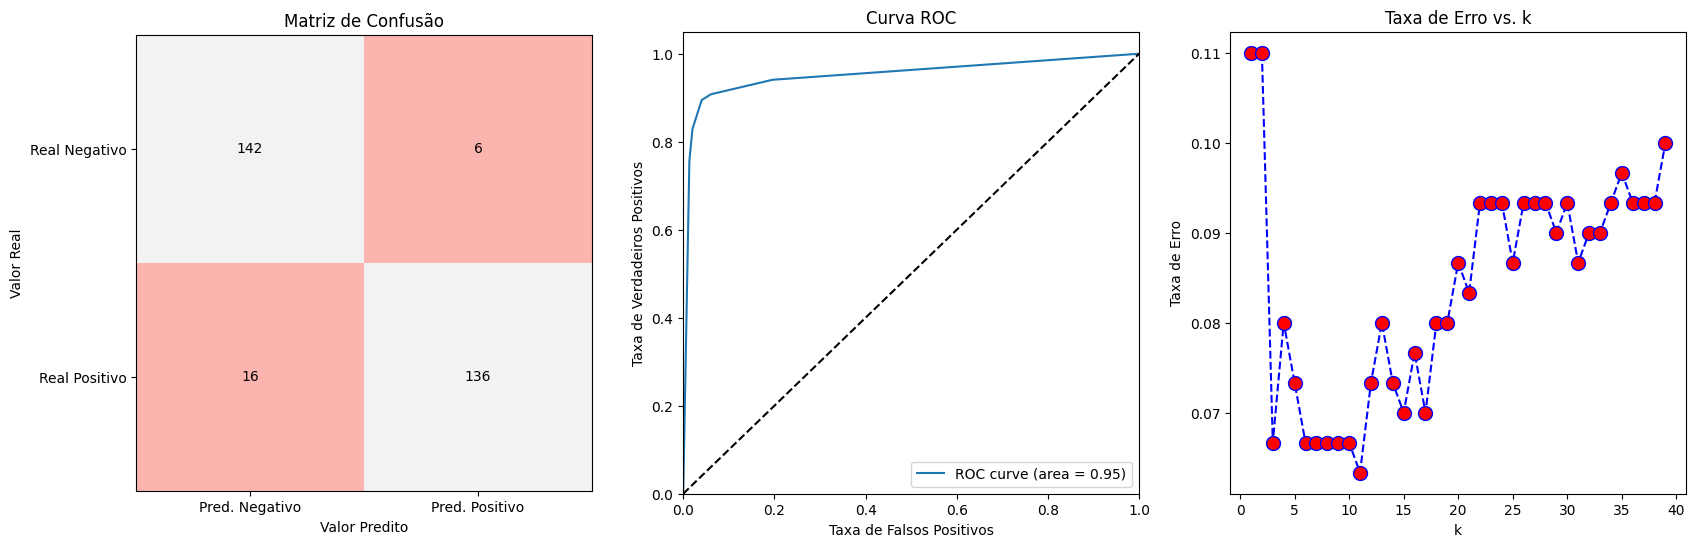

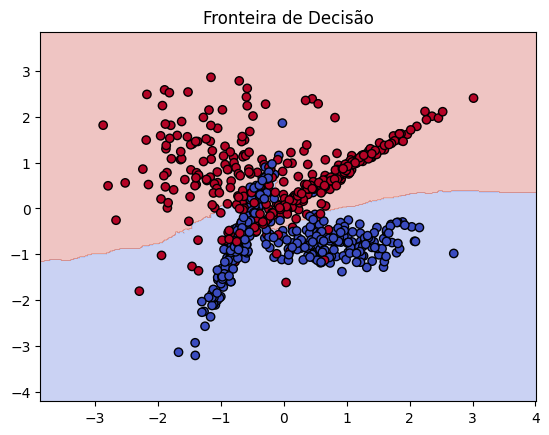

In [ ]:
# Gráficos
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Matriz de Confusão
ax[0].imshow(conf_matrix, interpolation='nearest', cmap='Pastel1')
ax[0].set_title('Matriz de Confusão')
ax[0].set_xticks([0, 1])
ax[0].set_yticks([0, 1])
ax[0].set_xticklabels(['Pred. Negativo', 'Pred. Positivo'])
ax[0].set_yticklabels(['Real Negativo', 'Real Positivo'])
ax[0].set_xlabel('Valor Predito')
ax[0].set_ylabel('Valor Real')
for i in range(2):
    for j in range(2):
        ax[0].text(j, i, format(conf_matrix[i, j]), ha='center', va='center', color='black')

# Curva ROC
ax[1].plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('Taxa de Falsos Positivos')
ax[1].set_ylabel('Taxa de Verdadeiros Positivos')
ax[1].set_title('Curva ROC')
ax[1].legend(loc="lower right")

# Erro em função do k
ax[2].plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
           markerfacecolor='red', markersize=10)
ax[2].set_title('Taxa de Erro vs. k')
ax[2].set_xlabel('k')
ax[2].set_ylabel('Taxa de Erro')

# Fronteira de decisão
fig, ax = plt.subplots()
plot_decision_boundary(X_train, y_train, knn, ax)
ax.set_title('Fronteira de Decisão')

plt.show()

O modelo KNN demonstrou uma performance sólida na previsão de falhas, com uma alta precisão e uma boa separação entre as classes, conforme mostrado pela curva ROC e pela matriz de confusão. O valor de k ao redor de 7 parece ser o mais adequado para minimizar erros, mas o modelo ainda apresenta desafios nas áreas onde as classes se sobrepõem, conforme indicado pela fronteira de decisão.